### 라이브러리 불러오기

<Axes: >

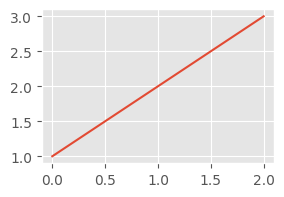

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))

In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


## 데이터 불러오기

In [6]:
df = pd.read_csv('./data/advertising(in).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
# 상위 5개의 행 확인
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## 데이터 이해

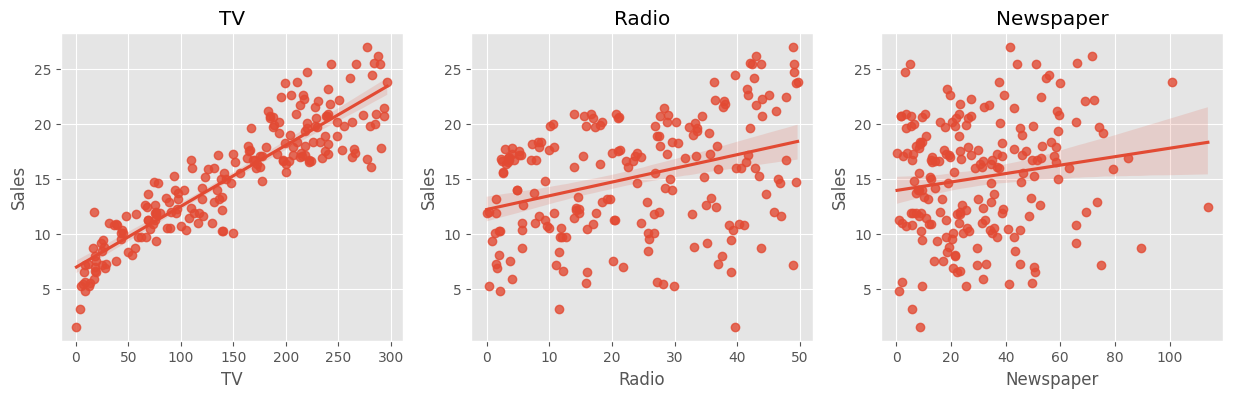

In [8]:
#그래프 크기
plt.figure(figsize=(15,4))

#tv 광고비에 따른 판매량
plt.subplot(1, 3, 1)
sns.regplot(data=df, x = 'TV', y = 'Sales')
plt.title('TV')

#Radio 광고비에 따른 판매량
plt.subplot(1, 3, 2)
sns.regplot(data=df, x = 'Radio', y = 'Sales')
plt.title('Radio')

#Newspaper 광고비에 따른 판매량
plt.subplot(1, 3, 3)
sns.regplot(data=df, x = 'Newspaper', y = 'Sales')
plt.title('Newspaper')

#그래프 그리기
plt.show()

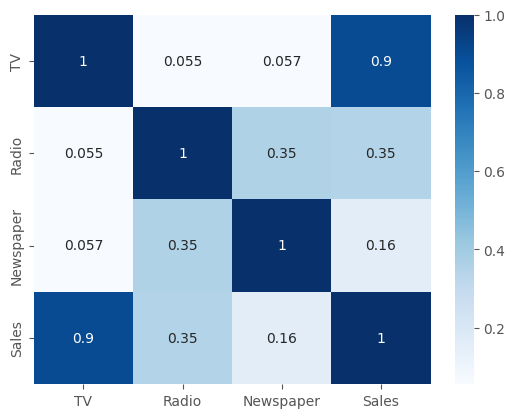

In [9]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

## Linear Regression

#### 변수 선택
TV는 독립변수 X, Sales는 종속변수 y

In [10]:
X = df[['TV']] # 독립변수는 2차원이어야 함
y = df['Sales']

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### 훈련 세트, 테스트 세트 분할
X의 훈련, 테스트, y의 훈련,테스트로 분할

In [11]:
train_test_split?

Object `train_test_split` not found.


디폴트는 Shuffel: 데이터를 섞어서 나눠줌
디폴트 값
test_size = 0.25
train_size = 0.75

In [12]:
# 훈련세트, 테스트세트 분할
from sklearn.model_selection import train_test_split

# Randomstate를 설정하여 결과 값이 같게
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.25)

# 2차원 데이터가 X
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 1) (50, 1) (150,) (50,)


Text(0.5, 1.0, 'train_test split')

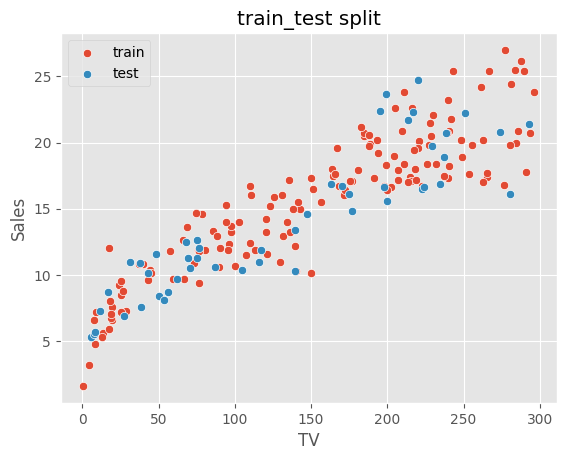

In [13]:
# 훈련세트, 테스트 세트 분할 확인(시각화)
sns.scatterplot(x=X_train['TV'], y=y_train, label = "train")
sns.scatterplot(x=X_test['TV'], y=y_test, label = "test")

# seaborn은 legend 없어도 됨, matplotlib은 있어야 함
plt.legend()
plt.title("train_test split")

### 모델 학습

#### 모델 생성 및 훈련

In [14]:
# LinearRegression 클래스 import
from sklearn.linear_model import LinearRegression

# 모델 생성하기
model = LinearRegression()

# 훈련데이터로 모델 훈련하기
# 훈련 함수는 fit인 경우가 많음
# y_train이 label
model.fit(X_train, y_train)

LinearRegression()

### 모델 테스트

#### 테스트세트로 평가

In [15]:
# sklearn.metrics 에 모델 평가를 위한 함수가 가 있음
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 테스트 데이터의 예측값
pred = model.predict(X_test)

# 실제값과 예측값 비교
# print(f'예측값\n {pred}')
# print(f'실제값\n {y_test}')

# 예측값과 실제값의 차이(Loss/Error) 이용한 모델 평가
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)
print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'R2 : {r2:.2f}')


MSE : 5.51
RMSE: 2.35
MAE : 1.87
R2 : 0.80


실제값과 모델의 예측값 비교

In [16]:
df_pred = pd.DataFrame({'X_test':X_test['TV'], 
'y_test':y_test, 
'y_pred':pred})
df_pred['error'] = df_pred['y_test']-df_pred['y_pred']
df_pred.head(10)

,X_test,y_test,y_pred,error
95,163.3,16.9,16.143474,0.756526
15,195.4,22.4,17.921382,4.478618
30,292.9,21.4,23.321569,-1.921569
158,11.7,7.3,7.746876,-0.446876
128,220.3,24.7,19.300506,5.399494
115,75.1,12.6,11.258382,1.341618
69,216.8,22.3,19.106654,3.193346
170,50.0,8.4,9.868180,-1.468180
174,222.4,16.5,19.416818,-2.916818
45,175.1,16.1,16.797035,-0.697035


In [17]:
# 회귀모델의 평가점수 수동 계산

mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

1.8651146911099161
5.513351187165511
2.3480526372220685
